In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sn
import matplotlib.pyplot as pyplot
import pymc3 as pm

from pymc3 import traceplot


# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression

# Scipy for statistics
import scipy
import theano

from arviz.utils import Numba
Numba.disable_numba()
Numba.numba_flag


import arviz as az #pymc3 plot functions use Arviz. Either command works. Ex: az.plot_posterior = pm.plot_posterior

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
#Import Data
NYCData = "nyc.csv" 
NYCDf = pd.read_csv(NYCData)

NYCDf.drop(["Unnamed: 0", "X", "Case"], axis = 1, inplace = True)
NYCDf.set_index("Restaurant", inplace = True)
NYCDf["Intercept"] = 1

NYCDf

,Price,Food,Decor,Service,East,Intercept
Restaurant,,,,,,
Daniella Ristorante,43,22,18,20,0,1
Tello's Ristorante,32,20,19,19,0,1
Biricchino,34,21,13,18,0,1
Bottino,41,20,20,17,0,1
Da Umberto,54,24,19,21,0,1
...,...,...,...,...,...,...
Baci,31,17,15,16,0,1
Puccini,26,20,16,17,0,1
Bella Luna,31,18,16,17,0,1


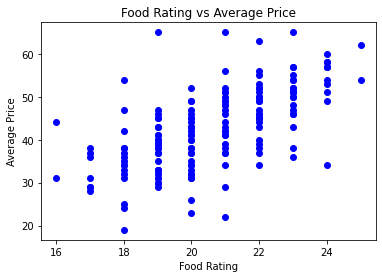

In [4]:
pyplot.plot(NYCDf["Food"],NYCDf["Price"], "bo")
pyplot.xlabel("Food Rating")
pyplot.ylabel("Average Price")
pyplot.title("Food Rating vs Average Price")
pyplot.show()

In [12]:
x = NYCDf["Food"]
y = NYCDf["Price"]

A = np.vstack([x, np.ones(len(x))]).T

In [6]:
betahat_1, intercept = np.linalg.lstsq(A, y, rcond=None)[0]
betahat_1, intercept

(2.9389598143043676, -17.83214855650661)

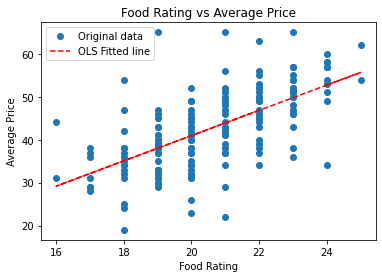

In [7]:
_ =pyplot.plot(x, y, 'o', label='Original data')
_ = pyplot.plot(x, betahat_1*x + intercept, 'r--', label='OLS Fitted line')
_ = pyplot.xlabel("Food Rating")
_ = pyplot.ylabel("Average Price")
_ = pyplot.title("Food Rating vs Average Price")
_ = pyplot.legend()
pyplot.show()

In [10]:
#df1 = NYCDf.loc[: ,["Food", "Price"]]
df1 = NYCDf.loc[:,["Food", "Price"]]
df1

,Food,Price
Restaurant,,
Daniella Ristorante,22,43
Tello's Ristorante,20,32
Biricchino,21,34
Bottino,20,41
Da Umberto,24,54
...,...,...
Baci,17,31
Puccini,20,26
Bella Luna,18,31


In [1]:
"""
with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sd = 10)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0, sd = 10)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Estimate of mean
    mean = intercept + slope * x
    
    # Observed values
#     Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)
    
#     # Sampler
#     step = pm.NUTS()

#     # Posterior distribution
#     linear_trace = pm.sample(1000, step)
"""

"\nwith pm.Model() as linear_model:\n    # Intercept\n    intercept = pm.Normal('Intercept', mu = 0, sd = 10)\n    \n    # Slope \n    slope = pm.Normal('slope', mu = 0, sd = 10)\n    \n    # Standard deviation\n    sigma = pm.HalfNormal('sigma', sd = 10)\n    \n    # Estimate of mean\n    mean = intercept + slope * x\n    \n    # Observed values\n#     Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y.values)\n    \n#     # Sampler\n#     step = pm.NUTS()\n\n#     # Posterior distribution\n#     linear_trace = pm.sample(1000, step)\n"

In [ ]:
#pm.traceplot(linear_trace, figsize = (12, 12))

In [ ]:
"""
with pm.Model() as linear_model:
    # Intercept
    intercept1 = pm.Normal('Intercept', mu = 0, sd = 10)
    
    # Slope 
    slope1 = pm.Normal('slope', mu = 2.5, sd = 4)
    
    # Standard deviation
    sigma1 = pm.HalfNormal('sigma', sd = 10)
    
    # Estimate of mean
    mean1 = intercept1 + slope1 * x
    
    # Observed values
    Y_obs1 = pm.Normal('Y_obs', mu = mean1, sd = sigma1, observed = y.values)
    
    # Sampler
    step1 = pm.NUTS()

    # Posterior distribution
    linear_trace1 = pm.sample(1000, step1)
"""

In [11]:
#pm.traceplot(linear_trace1, figsize = (12, 12))

In [13]:
with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sd = 100)
    
    # Slope 
    slope = slope1 = pm.Normal('slope', mu = 0, sd = 100)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Estimate of mean
    mean = intercept + slope * NYCDf["Food"]
    
    #start = pm.find_MAP()
    
    step = pm.NUTS()
    
#     trace = pm.sample(
#             1000, step, start, 
#             random_seed=42, progressbar=True
#         )
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = NYCDf["Price"].values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(1000, step)

C:\Users\Test\anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, slope, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 38 seconds.
The acceptance probability does not match the target. It is 0.8862197339542812, but should be close to 0.8. Try to increase the number of tuning steps.


C:\Users\Test\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
C:\Users\Test\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'slope'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

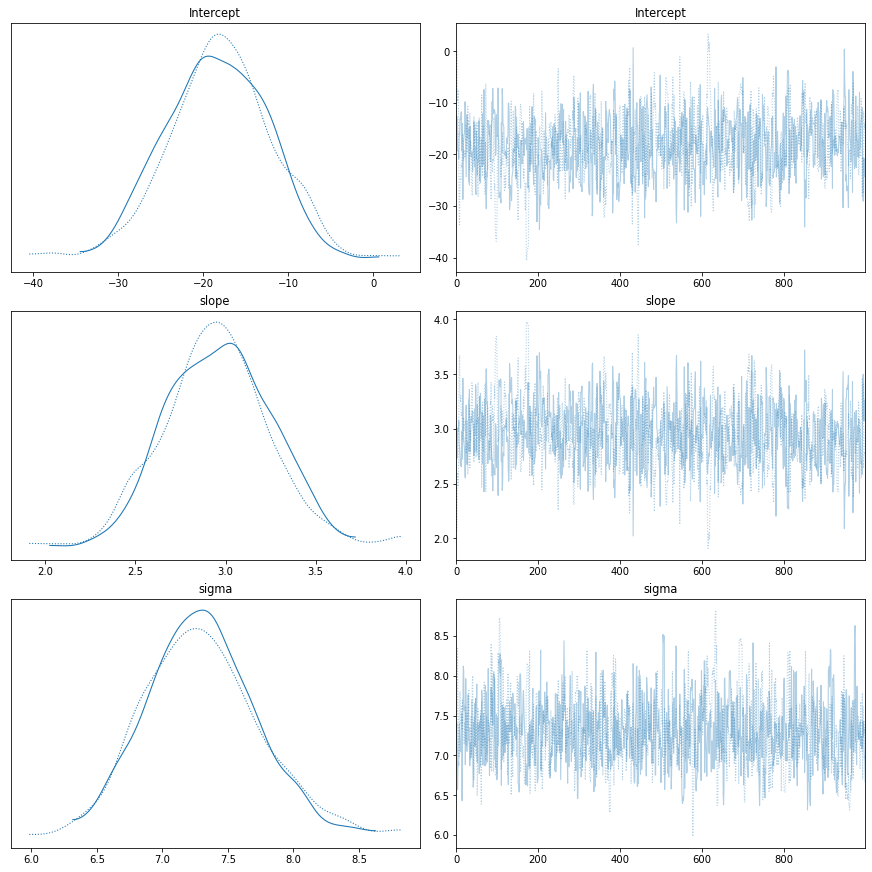

In [14]:
pm.traceplot(linear_trace, figsize = (12, 12))
#az.plot_trace(linear_trace)

C:\Users\Test\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'Intercept'}>,
       <AxesSubplot:title={'center':'slope'}>,
       <AxesSubplot:title={'center':'sigma'}>], dtype=object)

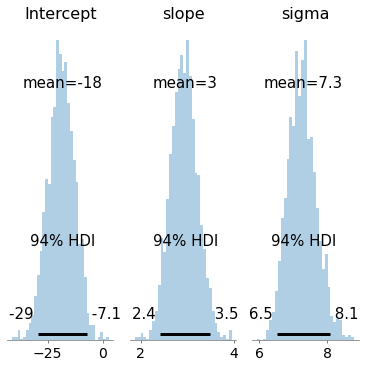

In [37]:
pm.plot_posterior(linear_trace, figsize = (5, 5), kind = "hist")

C:\Users\Test\anaconda3\lib\site-packages\pymc3\plots\posteriorplot.py:62: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  DeprecationWarning,


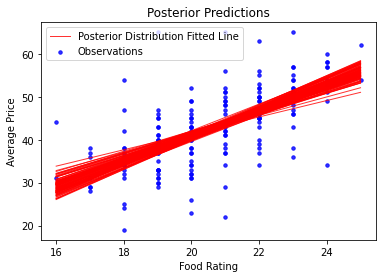

In [44]:
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(16,25, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Posterior Distribution Fitted Line',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
pyplot.scatter(NYCDf["Food"], y.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
pyplot.title('Posterior Predictions')
pyplot.xlabel('Food Rating')
pyplot.ylabel('Average Price')
pyplot.legend()